In [1]:
# Analysis Sample Audio 
from scipy.io import wavfile
from scipy.signal import find_peaks
import matplotlib.pyplot as plt
import numpy as np
# if using a jupyter notebook
%matplotlib inline 

In [2]:
fs, data = wavfile.read('./res/c.wav')

In [3]:
T = data.shape[0] / fs                        # Time Duration

t_axis = np.linspace(0, T, data.shape[0])     # Time axis

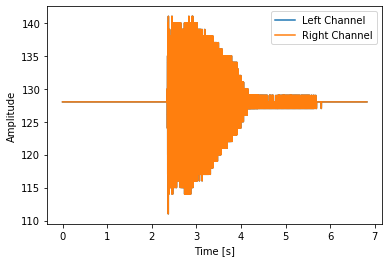

In [23]:
plt.plot(t_axis, data[:, 0], label="Left Channel")
plt.plot(t_axis, data[:, 1], label="Right Channel")
plt.legend(loc='upper right')
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show()

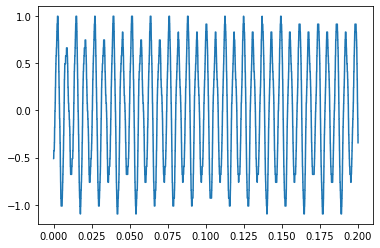

In [31]:
# Time Domain Representation 
t1 = 2.5
t2 = 2.7
ds = data[int(t1*fs):int(t2*fs), 0]    # Slice of audio data
ds = ds - np.mean(ds)                  # Tip: convert to positive and negative altering signal
# ds = ds / np.linalg.norm(ds)           
amp = 1/max(ds)                        # Normalize
ds *= amp                              # Tip: Multiplication is faster than division!

plt.plot(np.linspace(0, t2-t1, len(ds)), ds)
plt.show()

In [32]:
# Frequency domain representation
ft = np.fft.fft(ds)/len(ds)      

ft = ft[range(int(len(ds)/2))]         # Remove mirror frequency domain

ft = abs(ft)                           # Convert complex to real

amp = 1/max(ft); ft *= amp             # Normalize

f_axis = np.linspace(0, fs/4, len(ft)) # Frequency domain axis

peaks, _ = find_peaks(ft, height=0)    # Find peaks

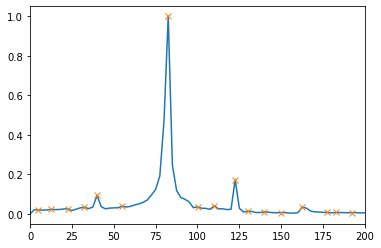

In [33]:
plt.plot(f_axis, ft)
plt.plot(f_axis[peaks], ft[peaks], "x")
axes = plt.gca()
axes.set_xlim([0, 200])
plt.show()

In [34]:
fs/4/len(ft)*np.argmax(ft)             # Signal Frequency

82.5

In [38]:
# Autocorrelation
acor = np.correlate(ds, ds, mode='full')

amp = 1/max(acor); acor *= amp                        # Normalize

T = t2 - t1
acor_axis = np.linspace(-T, T, len(acor))      # Axis
# acor_axis = np.linspace(-T, T, len(acor))      # Axis

peaks, _ = find_peaks(acor, height=0)          # Find peaks
acor[peaks]

array([2.60607945e-04, 2.58934642e-04, 1.87699742e-02, 4.22697499e-02,
       7.73511585e-02, 1.00508254e-01, 1.38820505e-01, 1.57750032e-01,
       1.99389235e-01, 2.17260496e-01, 2.62439619e-01, 2.76554622e-01,
       3.24468752e-01, 3.34371203e-01, 3.84444547e-01, 3.91977782e-01,
       4.45672498e-01, 4.50098029e-01, 5.03780704e-01, 5.05648625e-01,
       5.63835098e-01, 5.63241877e-01, 6.25278678e-01, 6.21203124e-01,
       6.85890647e-01, 6.79609085e-01, 7.50246363e-01, 7.39841109e-01,
       8.13865961e-01, 7.99362620e-01, 8.74561873e-01, 8.57644944e-01,
       9.37795060e-01, 9.13951283e-01, 1.00000000e+00, 9.13951283e-01,
       9.37795060e-01, 8.57644944e-01, 8.74561873e-01, 7.99362620e-01,
       8.13865961e-01, 7.39841109e-01, 7.50246363e-01, 6.79609085e-01,
       6.85890647e-01, 6.21203124e-01, 6.25278678e-01, 5.63241877e-01,
       5.63835098e-01, 5.05648625e-01, 5.03780704e-01, 4.50098029e-01,
       4.45672498e-01, 3.91977782e-01, 3.84444547e-01, 3.34371203e-01,
      

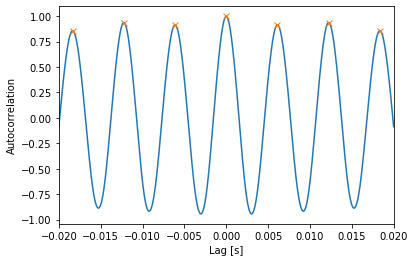

In [36]:
plt.plot(acor_axis, acor)
plt.plot(acor_axis[peaks], acor[peaks], "x")
axes = plt.gca()
axes.set_xlim([-0.02, 0.02])
plt.xlabel("Lag [s]")
plt.ylabel("Autocorrelation")
plt.show()

In [343]:
1/83, 1/166

(0.012048192771084338, 0.006024096385542169)